In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [9]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.xls')

In [52]:
cacao.columns = ['id','maker','origin','ref','date','cocoa_percent','location','rating','bean_type','bean_origin']

In [53]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1795 non-null   int64  
 1   maker          1795 non-null   object 
 2   origin         1795 non-null   object 
 3   ref            1795 non-null   int64  
 4   date           1795 non-null   int64  
 5   cocoa_percent  1795 non-null   object 
 6   location       1795 non-null   object 
 7   rating         1795 non-null   float64
 8   bean_type      1794 non-null   object 
 9   bean_origin    1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [54]:
cacao.drop(['id'], inplace = True, axis = 1)

In [55]:
company = pd.DataFrame(cacao.maker.value_counts())

In [56]:
cacao.maker = cacao.maker.apply(lambda x: None if x.strip() == '' else x)

In [57]:
display(pd.DataFrame(cacao.maker.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.maker.value_counts()>10).sum())
cacao.loc[:, ['maker']].info()

,maker
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
...,...
Cloudforest,1
Whittakers,1
Svenska Kakaobolaget,1
Cote d' Or (Kraft),1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   maker   1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


In [58]:
display(pd.DataFrame(cacao.origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.origin.value_counts()>10).sum())
cacao.loc[:, ['origin']].info()

,origin
,58
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
...,...
"A case of the Xerces Blues, triple roast",1
"Alto Beni, Wild Harvest, Itenez R., 60hr c.",1
"Island Growers, 120hr c.",1
"Camino Verde, Balao, Guayas",1


Значений, встретившихся в столбце более 10 раз: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   origin  1795 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

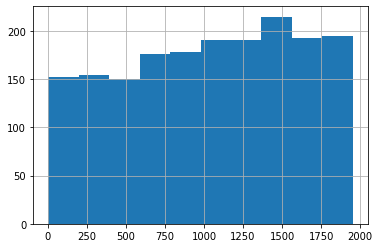

In [59]:
cacao.ref.hist()
cacao.ref.describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: date, dtype: float64

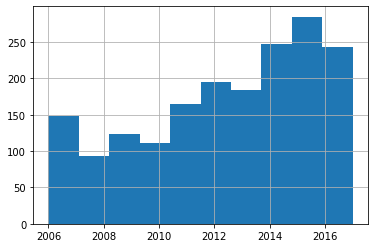

In [60]:
cacao.date.hist()
cacao.date.describe()

In [61]:
cacao.cocoa_percent


0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

In [62]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))


count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

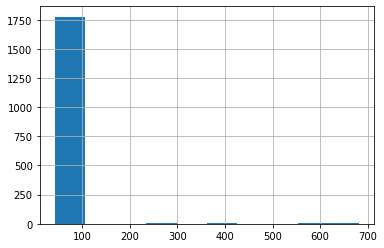

In [63]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

70.0 5.0 62.5 77.5


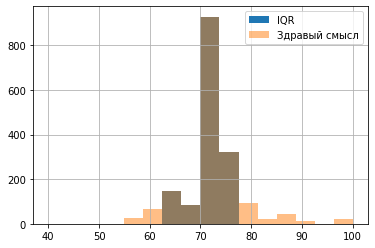

In [64]:
median = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
print(median, IQR, median - 1.5*IQR, median + 1.5*IQR)
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(median - 1.5*IQR, median + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();

In [65]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]

In [66]:
cacao.location


0        France
1        France
3        France
4        France
5        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: location, Length: 1776, dtype: object

In [67]:
display(pd.DataFrame(cacao.location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.location.value_counts()>10).sum())
cacao.loc[:, ['location']].info()

,location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Wales,1
Suriname,1
Ghana,1
Eucador,1


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


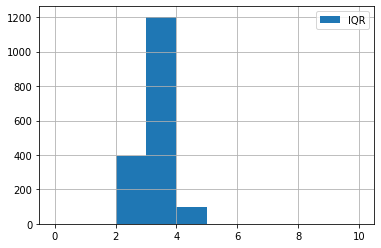

In [68]:

median = cacao.rating.median()
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

In [69]:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [70]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  861 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [71]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
EET,3
Matina,3
Beniano,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [72]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [75]:
cacao.bean_origin = cacao.bean_origin.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
display(pd.DataFrame(cacao.bean_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_origin']].info()

,bean_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
Dominican Republic,135
...,...
"Ven, Trinidad, Ecuador",1
Suriname,1
"Peru, Belize",1
"Ven., Trinidad, Mad.",1


Значений, встретившихся в столбце более 10 раз: 26
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   bean_origin  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [77]:
cacao.bean_origin = cacao.bean_origin.apply(fix_countries).sort_values()


In [78]:

display(pd.DataFrame(cacao.bean_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.bean_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_origin.nunique())
cacao.loc[:, ['bean_origin']].info()

,bean_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
...,...
"Venezuela,Africa,Brasil,Peru,Mexico",1
"PapuaNewGuinea,Vanuatu,Madagascar",1
"Peru,Belize",1
"Madagascar,Ecuador",1


Значений, упомянутых более 10 раз: 26
Уникальных значений: 94
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   bean_origin  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


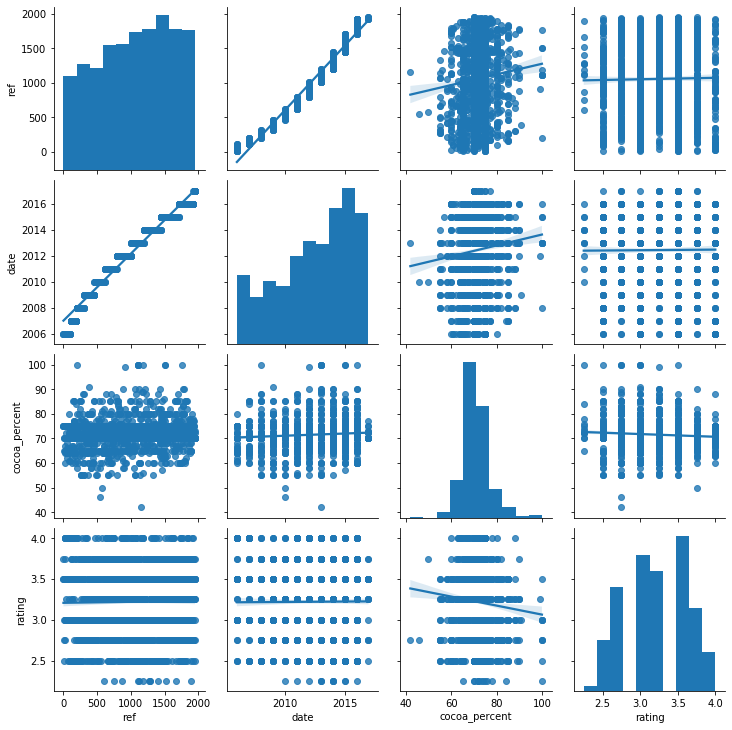

In [79]:
sns.pairplot(cacao, kind = 'reg')

In [80]:
cacao.corr()


,ref,date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


In [84]:
cacao.drop(['ref'], inplace = True, axis = 1)

In [85]:
cacao.corr()

,date,cocoa_percent,rating
date,1.000000,0.086523,0.006703
cocoa_percent,0.086523,1.000000,-0.078156
rating,0.006703,-0.078156,1.000000


In [86]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

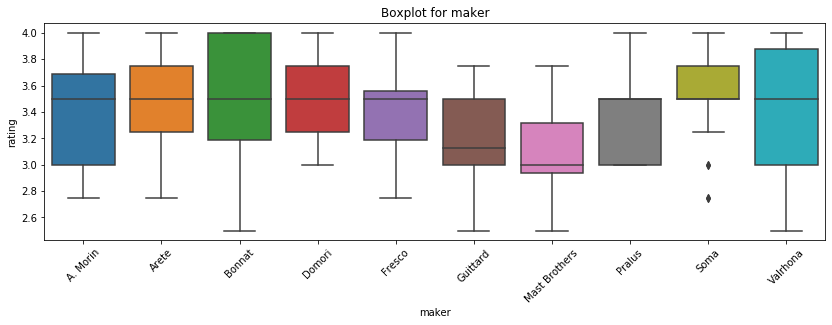

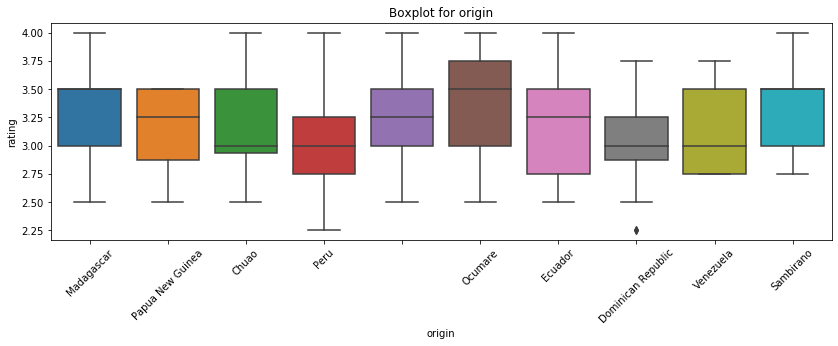

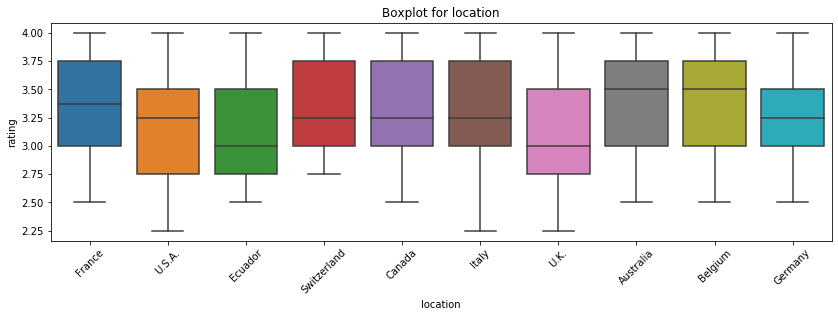

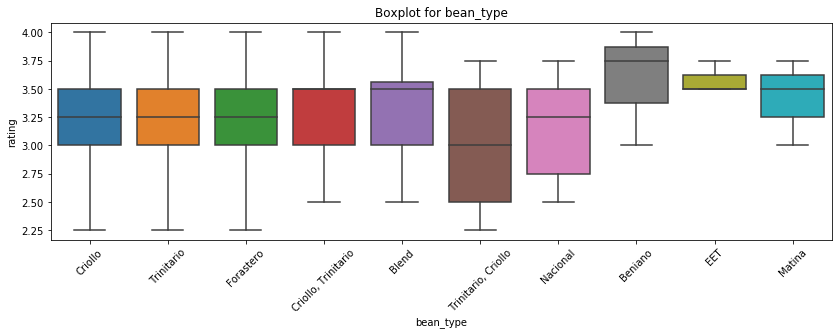

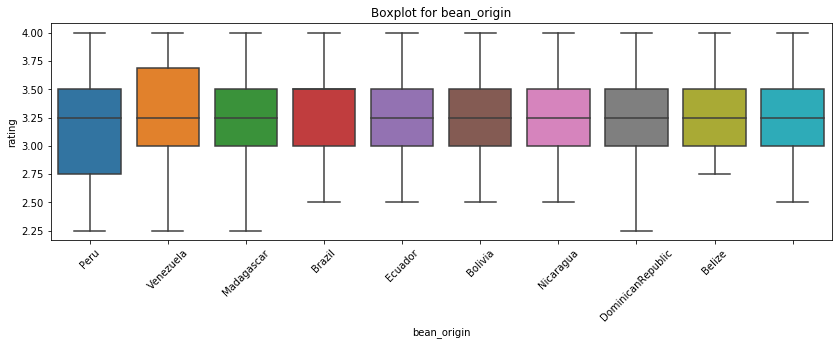

In [88]:
for col in ['maker', 'origin', 'location', 'bean_type', 'bean_origin']:
    get_boxplot(col)

In [89]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [91]:
for col in ['maker', 'origin', 'location', 'bean_type', 'bean_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки maker
Найдены статистически значимые различия для колонки origin
Найдены статистически значимые различия для колонки location


In [93]:
cacao_for_model = cacao.loc[:, ['maker', 'origin', 'location', 'date', 'cocoa_percent']]
cacao_for_model.head()

,maker,origin,location,date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0


In [5]:
s = pd.Series(list('abcd'))

In [7]:
pd.get_dummies(s, drop_first=True)

,b,c,d
0,0,0,0
1,1,0,0
2,0,1,0
3,0,0,1


In [10]:
pd.get_dummies(cacao)

,Bar id,REF,Review\nDate,Rating,Company \n(Maker-if known)_A. Morin,Company \n(Maker-if known)_AMMA,Company \n(Maker-if known)_Acalli,Company \n(Maker-if known)_Adi,Company \n(Maker-if known)_Aequare (Gianduja),Company \n(Maker-if known)_Ah Cacao,Company \n(Maker-if known)_Akesson's (Pralus),Company \n(Maker-if known)_Alain Ducasse,Company \n(Maker-if known)_Alexandre,Company \n(Maker-if known)_Altus aka Cao Artisan,Company \n(Maker-if known)_Amano,Company \n(Maker-if known)_Amatller (Simon Coll),Company \n(Maker-if known)_Amazona,Company \n(Maker-if known)_Ambrosia,Company \n(Maker-if known)_Amedei,Company \n(Maker-if known)_Anahata,Company \n(Maker-if known)_Animas,Company \n(Maker-if known)_Ara,Company \n(Maker-if known)_Arete,Company \n(Maker-if known)_Artisan du Chocolat,Company \n(Maker-if known)_Artisan du Chocolat (Casa Luker),...,Broad Bean\nOrigin_Tanzania,Broad Bean\nOrigin_Tobago,Broad Bean\nOrigin_Togo,Broad Bean\nOrigin_Trinidad,"Broad Bean\nOrigin_Trinidad, Ecuador","Broad Bean\nOrigin_Trinidad, Tobago",Broad Bean\nOrigin_Trinidad-Tobago,Broad Bean\nOrigin_Uganda,Broad Bean\nOrigin_Vanuatu,"Broad Bean\nOrigin_Ven, Bolivia, D.R.","Broad Bean\nOrigin_Ven, Trinidad, Ecuador","Broad Bean\nOrigin_Ven., Indonesia, Ecuad.","Broad Bean\nOrigin_Ven., Trinidad, Mad.","Broad Bean\nOrigin_Ven.,Ecu.,Peru,Nic.","Broad Bean\nOrigin_Venez,Africa,Brasil,Peru,Mex",Broad Bean\nOrigin_Venezuela,"Broad Bean\nOrigin_Venezuela, Carribean","Broad Bean\nOrigin_Venezuela, Dom. Rep.","Broad Bean\nOrigin_Venezuela, Ghana","Broad Bean\nOrigin_Venezuela, Java","Broad Bean\nOrigin_Venezuela, Trinidad",Broad Bean\nOrigin_Venezuela/ Ghana,Broad Bean\nOrigin_Vietnam,Broad Bean\nOrigin_West Africa,Broad Bean\nOrigin_
0,1,1876,2016,11.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1676,2015,2.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1676,2015,3.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1680,2015,3.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1704,2015,3.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,1791,647,2011,3.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1791,1792,749,2011,3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1792,1793,749,2011,3.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1793,1794,781,2011,3.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
